# IPL winning Analysis from Season 2008 to 2019 using Python

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
#Analysing how different teams perform in different seasons i.e. 2008 to 2019
df_ipl=pd.read_csv('matches.csv')# loading the dataset
df_ipl.head()#the first five records of dataset

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [28]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [29]:
#looking at the number of rows and columns in the dataset
df_ipl.shape

(756, 18)

### Team wise analsys

In [30]:
#lets write a function to find the matches won by teams
def wins(DataFrame):
    teamnames= set(DataFrame['team1'])
    teamlist= []
    winlist= []
    
    for mem in teamnames:
        teamlist.append(mem)
        winlist.append(len(DataFrame[DataFrame['winner']==mem]))
        
#plot the matches won by teams
    plt.figure(figsize=(10,5))
    plt.bar(teamlist,winlist)
    plt.xlabel('Team names')
    plt.ylabel('No: of Wins')
    plt.title('No: of matches won by teams in seasons 2008 to 2019')
    plt.grid('True')
    plt.xticks(rotation = 'vertical')
    plt.show()
    

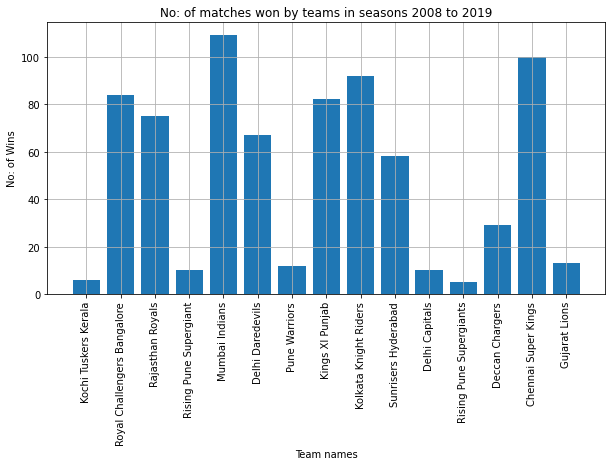

TypeError: 'NoneType' object is not subscriptable

In [39]:
wins(df_ipl)

In [35]:
#modifing the above Function to get the player with most man of the matches
def ManofTheMatch(DataFrame):
    playernames=set(DataFrame['player_of_match'])
    playernamelist=[]
    playerwinlist=[]
    for player in playernames:
        wons=len(DataFrame[DataFrame['player_of_match']==player])
        if wons<5:
            continue
        playernamelist.append(player) 
        playerwinlist.append(wons)
    playernamelist=np.array(playernamelist)
    playerwinlist=np.array(playerwinlist)
    
    plt.figure(figsize=(15,8))
    plt.bar(playernamelist,playerwinlist)
    plt.xlabel('Player Names')
    plt.ylabel('No: of times Title Man of the Match')
    plt.title('IPL 2008-2019: Bar graph of Man of match titles (more than 5 titles won)')
    plt.xticks(rotation='vertical')
    plt.show()
    

        

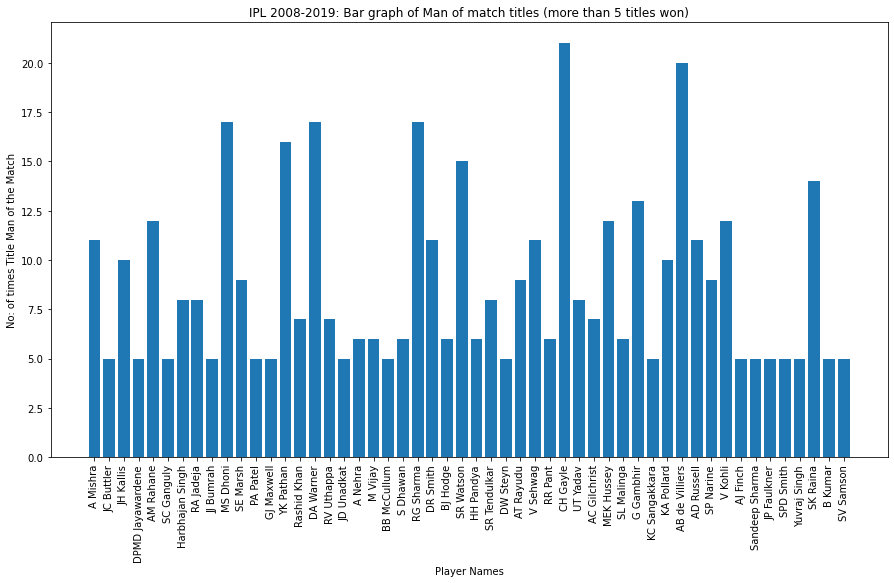

In [36]:
ManofTheMatch(df_ipl)

In [37]:
###lets write a function to do a team wise analysis 
def Analyzer(DataFrame):
    nameOfTeams = set(DataFrame['team1'])
    for mem in nameOfTeams:
        total_matchesPlayed = len(DataFrame[  (DataFrame['team1'] == mem) | (DataFrame['team2'] == mem)      ])
        total_matchesWon = len(DataFrame[  ((DataFrame['team1'] == mem) | (DataFrame['team2'] == mem)) & (DataFrame['winner'] == mem)])
        winRatio = total_matchesWon /  total_matchesPlayed
        winsWhenBat = len(DataFrame[  ((DataFrame['team1'] == mem) | (DataFrame['team2'] == mem)) & (DataFrame['winner'] == mem) & (DataFrame['toss_decision'] == 'bat')] )
        print('=====================================================================\n')
        print ('Team Name:{}'.format(mem))
        print('Total matches Played:{}'.format(total_matchesPlayed))
        print('Total matches Won:{}'.format(total_matchesWon))
        print('Total matches Lost:{}'.format(total_matchesPlayed - total_matchesWon ))
        print('Wining Percentage:{}'.format(winRatio * 100))
        print('Winining ratio when Choosed to bat:{}'.format((winsWhenBat/total_matchesWon) * 100))
        print('Winning ratio when Choosed to field:{}'.format((1 - (winsWhenBat/total_matchesWon))*100))
        print('=====================================================================\n')
        

In [38]:
Analyzer(df_ipl)


Team Name:Kochi Tuskers Kerala
Total matches Played:14
Total matches Won:6
Total matches Lost:8
Wining Percentage:42.857142857142854
Winining ratio when Choosed to bat:0.0
Winning ratio when Choosed to field:100.0


Team Name:Royal Challengers Bangalore
Total matches Played:180
Total matches Won:84
Total matches Lost:96
Wining Percentage:46.666666666666664
Winining ratio when Choosed to bat:30.952380952380953
Winning ratio when Choosed to field:69.04761904761905


Team Name:Rajasthan Royals
Total matches Played:147
Total matches Won:75
Total matches Lost:72
Wining Percentage:51.02040816326531
Winining ratio when Choosed to bat:45.33333333333333
Winning ratio when Choosed to field:54.666666666666664


Team Name:Rising Pune Supergiant
Total matches Played:16
Total matches Won:10
Total matches Lost:6
Wining Percentage:62.5
Winining ratio when Choosed to bat:0.0
Winning ratio when Choosed to field:100.0


Team Name:Mumbai Indians
Total matches Played:187
Total matches Won:109
Total matche

### Most Man Of The Match Title Winner

In [7]:
#getting the frequency of the most man of the matches
df_ipl['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
S Sreesanth        1
SA Asnodkar        1
MF Maharoof        1
RP Singh           1
S Badrinath        1
Name: player_of_match, Length: 226, dtype: int64

In [8]:
#getting top 10 players with most man of the match
df_ipl['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [9]:
ipl_list=list(df_ipl['player_of_match'].value_counts()[0:10].keys())

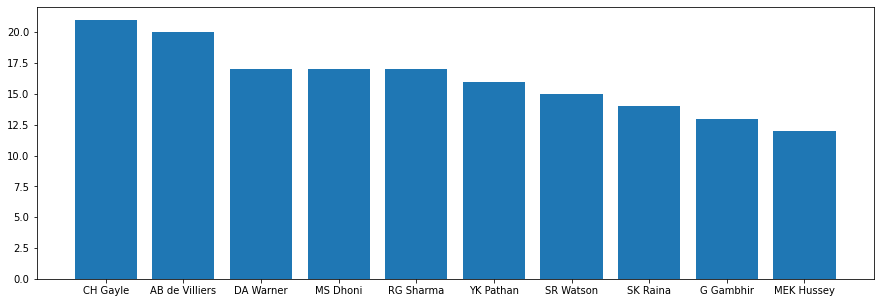

In [10]:
#making bar plot with most top 10 man of the match award
plt.figure(figsize=(15,5))
plt.bar(ipl_list,df_ipl['player_of_match'].value_counts()[0:10])
plt.show()

In [11]:
#Getting frequency of result column
df_ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [12]:
#finding out most number of toss winner w.r.t team
df_ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

##### Match Winning By Toss Winning

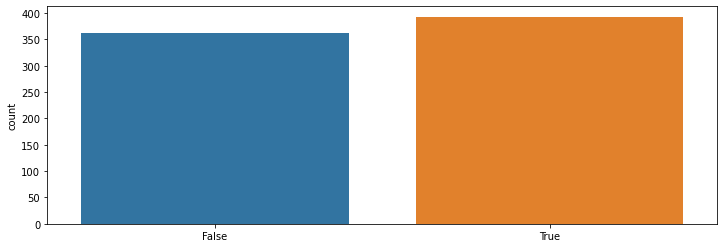

In [47]:
#Has Toss-winning helped in Match-winning?
to = df_ipl['toss_winner'] == df_ipl['winner']

plt.figure(figsize=(12,4))

sns.countplot(to)

plt.show()

*From the above countplot it looks like, Toss winning actually helps in Match winning – or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.*

<!-- *From the above countplot it looks like, Toss winning actually helps in Match winning – or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps. -->

##### Match winning By Toss winner

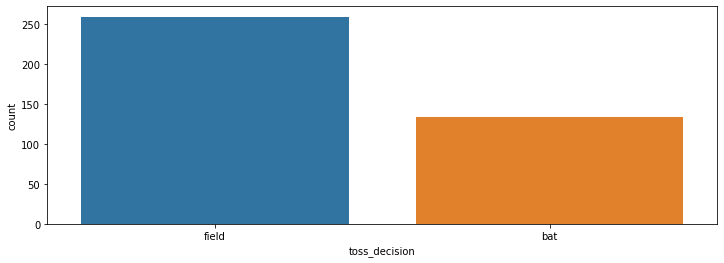

In [45]:
#Does choosing batting or bowling first helped in match winning?
plt.figure(figsize=(12,4))

sns.countplot(df_ipl.toss_decision[df_ipl.toss_winner==df_ipl.winner])

plt.show()

 

*From the above visualization, we can say that choosing to field first for the toss winner helped in winning the match than batting first in IPL from 2007 to 2017.*

### Trend of winning team for the first batting?

In [13]:
#Extracting the records where a team won batting first
batting_first=df_ipl[df_ipl['win_by_runs']!=0]
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


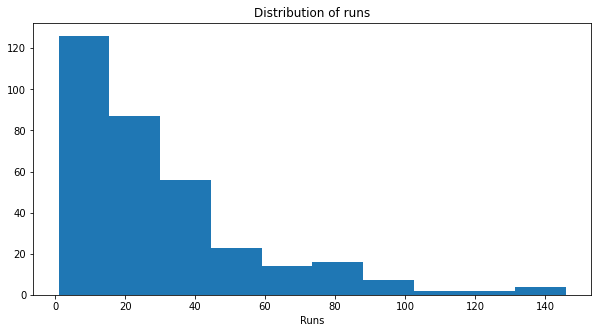

In [14]:
#distribution of the records where a team won batting first
#making a histogram
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of runs')
plt.xlabel('Runs')
plt.show()

In [15]:
#finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

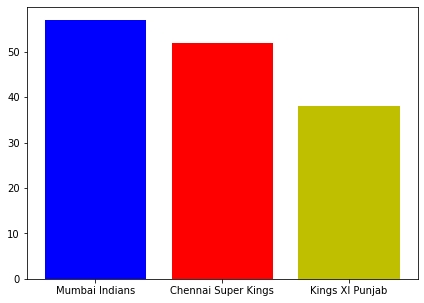

In [16]:
#making a bar plot for top 3 teams after batting first
top3_batting_first=batting_first['winner'].value_counts()[0:3].keys()
plt.figure(figsize=(7,5))
plt.bar(top3_batting_first,batting_first['winner'].value_counts()[0:3],color=('b','r','y'))
plt.show()

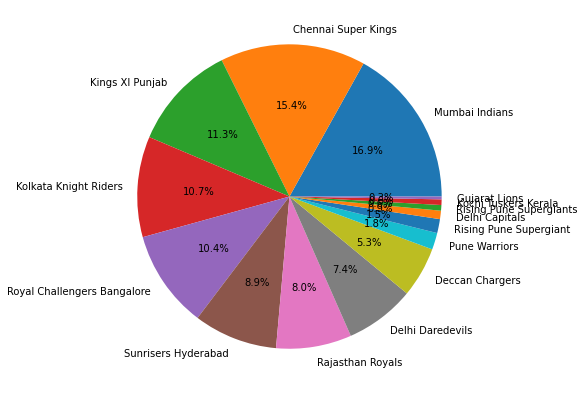

In [17]:
#what is the percentage of each team win after batting first
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

---

### What is Trend of teams wins choosing field?

In [18]:
#Extracting those records who won the team after batting second
batting_second=df_ipl[df_ipl['win_by_wickets']!=0]
batting_second.head()#looking at the data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


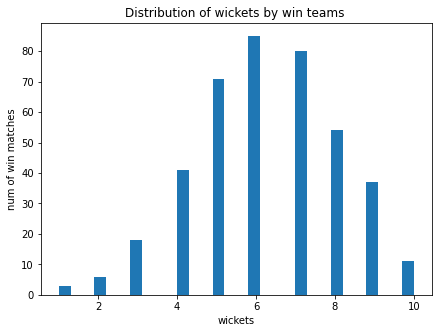

In [19]:
#looking a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,5))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.title('Distribution of wickets by win teams ')
plt.ylabel('num of win matches')
plt.xlabel('wickets')
plt.show()

In [20]:
#finding out the frequency of number of wins w.r.t each team after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

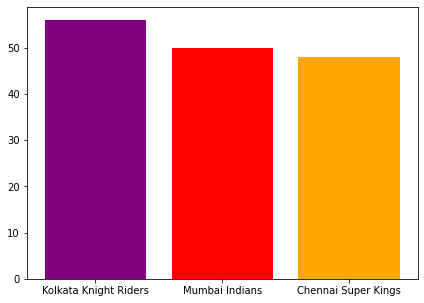

In [21]:
#making a bar plot for top 3 teams after batting second
top3_batting_second=batting_second['winner'].value_counts()[0:3].keys()
plt.figure(figsize=(7,5))
plt.bar(top3_batting_second,batting_second['winner'].value_counts()[0:3],color=('purple','red','orange'))
plt.show()

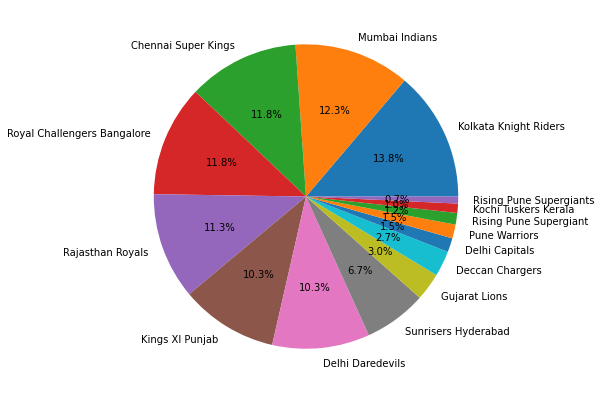

In [22]:
#what is the percentage of each team win after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [23]:
#number of matches played each season
df_ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2016    60
IPL-2018    60
IPL-2010    60
IPL-2014    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [24]:
#Finding out how many times a team has won the match after winning the toss
import numpy as np
np.sum(df_ipl['toss_winner']==df_ipl['winner'])

393

In [40]:
df_deliveries=pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df_deliveries.shape

In [41]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [44]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [55]:
len(df_deliveries['match_id'].unique())

756

In [53]:
df_deliveries[df_deliveries['match_id']==1].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [57]:
df_deliveries.match_id.unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [59]:
matches_1=df_deliveries[df_deliveries['match_id']==1]
matches_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [60]:
matches_1.shape

(248, 21)

In [64]:
matches_1.inning.unique()

array([1, 2], dtype=int64)

In [62]:
srch=matches_1[matches_1['inning']==1]
srch.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [63]:
srch.shape

(125, 21)

In [65]:
srch['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting'], dtype=object)

In [70]:
srch.groupby('batsman')['batsman_runs'].value_counts()

batsman       batsman_runs
BCJ Cutting   1                2
              6                2
              0                1
              2                1
DA Warner     0                6
              4                2
              6                1
DJ Hooda      1                8
              0                2
              2                1
              6                1
MC Henriques  1               19
              0                9
              2                3
              4                3
              6                2
              3                1
S Dhawan      1               18
              0                7
              4                5
              2                1
Yuvraj Singh  1               10
              0                7
              4                7
              2                3
              6                3
Name: batsman_runs, dtype: int64

In [71]:
srch['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [79]:
rcb=matches_1[[matches_1['inning']==2] & [matches_1['batting_team']=='RoyalChallengersBangalore']]
rcb.head()

TypeError: unsupported operand type(s) for &: 'list' and 'list'

In [77]:
rcb.batting_team.unique()

array(['Royal Challengers Bangalore'], dtype=object)

In [75]:
rcb.batsman.unique()

array(['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM Jadhav', 'SR Watson',
       'Sachin Baby', 'STR Binny', 'S Aravind', 'YS Chahal', 'TS Mills',
       'A Choudhary'], dtype=object)

In [74]:
rcb.groupby('batsman')['batsman_runs'].value_counts()

batsman        batsman_runs
A Choudhary    0                1
               6                1
CH Gayle       0               13
               1                4
               6                3
               4                2
               2                1
KM Jadhav      1                9
               0                4
               4                4
               6                1
Mandeep Singh  0                8
               4                5
               1                2
               2                1
S Aravind      0                2
SR Watson      1                8
               0                5
               2                2
               4                1
               6                1
STR Binny      1                5
               0                4
               6                1
Sachin Baby    0                2
               1                1
TM Head        1               12
               0                4
               2    